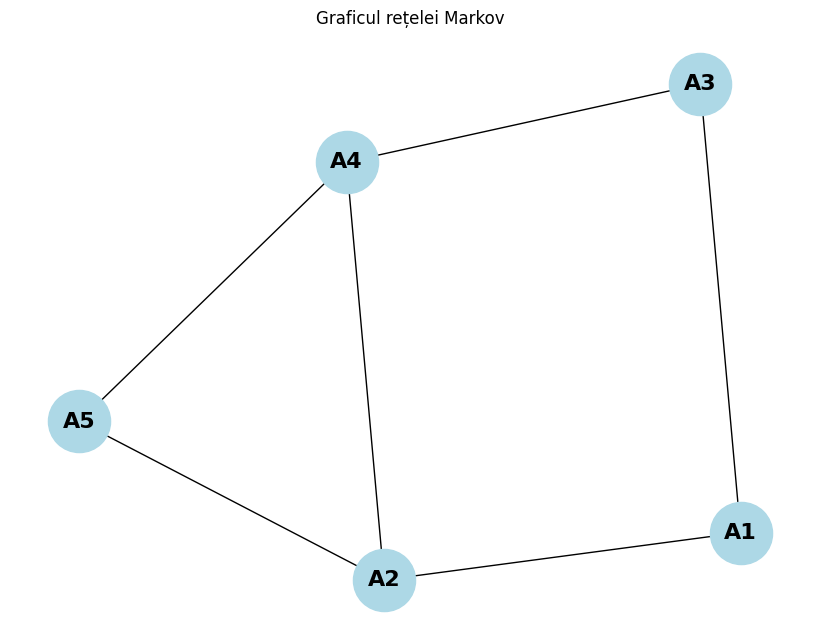

Clicile modelului:
['A4', 'A2', 'A5']
['A4', 'A3']
['A1', 'A2']
['A1', 'A3']

Probabilitatea comună a variabilelor:
+-------+-------+-------+-------+-------+-----------------------+
| A1    | A2    | A3    | A4    | A5    |   phi(A1,A2,A3,A4,A5) |
+=======+=======+=======+=======+=======+=======================+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(0) |                0.0756 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(1) |                0.0126 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(0) |                0.0042 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(1) |                0.0004 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(1) | A4(0) | A5(0) |                0.0336 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(1) | 

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import MarkovNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import DiscreteFactor

edges = [('A1', 'A2'), ('A1', 'A3'), 
         ('A2', 'A4'), ('A2', 'A5'), 
         ('A3', 'A4'), 
         ('A4', 'A5')]

model = MarkovNetwork(edges)

plt.figure(figsize=(8, 6))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', arrows=True)
plt.title('Graficul rețelei Markov')
plt.show()

cliques = list(nx.find_cliques(G))
print("Clicile modelului:")
for clique in cliques:
    print(clique)

pot_A1_A2 = DiscreteFactor(variables=['A1', 'A2'], cardinality=[2, 2], values=[0.5, 0.5, 0.5, 0.5])
pot_A1_A3 = DiscreteFactor(variables=['A1', 'A3'], cardinality=[2, 2], values=[0.5, 0.5, 0.5, 0.5])
pot_A2_A4 = DiscreteFactor(variables=['A2', 'A4'], cardinality=[2, 2], values=[0.7, 0.3, 0.9, 0.1])
pot_A2_A5 = DiscreteFactor(variables=['A2', 'A5'], cardinality=[2, 2], values=[0.8, 0.2, 0.6, 0.4])
pot_A3_A4 = DiscreteFactor(variables=['A3', 'A4'], cardinality=[2, 2], values=[0.9, 0.1, 0.4, 0.6])
pot_A4_A5 = DiscreteFactor(variables=['A4', 'A5'], cardinality=[2, 2], values=[0.6, 0.4, 0.7, 0.3])

model.add_factors(pot_A1_A2, pot_A1_A3, pot_A2_A4, pot_A2_A5, pot_A3_A4, pot_A4_A5)

assert model.check_model()

inference = VariableElimination(model)
joint_distribution = inference.query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])
print("\nProbabilitatea comună a variabilelor:")
print(joint_distribution)

max_prob_state = joint_distribution.values.argmax()
max_state = joint_distribution.values[max_prob_state]
print(f"\nStarea cu probabilitate maximă: {max_prob_state}, cu probabilitate: {max_state}")
